O salário muda de acordo com os anos de educação superior?

### Importação das bibliotecas

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm

### Importação da base de dados

In [13]:
df = pd.read_csv('dados/base_funcionarios_v1.csv', sep=';', index_col='id')
df.shape

(46, 2)

In [14]:
df.head()

,Salario,Anos_Educ_Superior
id,,
1,5517.4,3
2,6399.9,4
3,6206.7,6
4,6060.6,4
5,6122.7,2


In [15]:
df.dtypes

Salario               float64
Anos_Educ_Superior      int64
dtype: object

### Análise Exploratória dos Dados

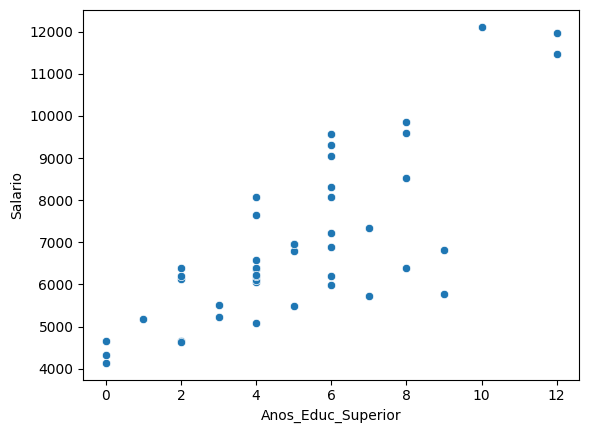

In [16]:
sns.scatterplot(x=df.Anos_Educ_Superior, y=df.Salario);

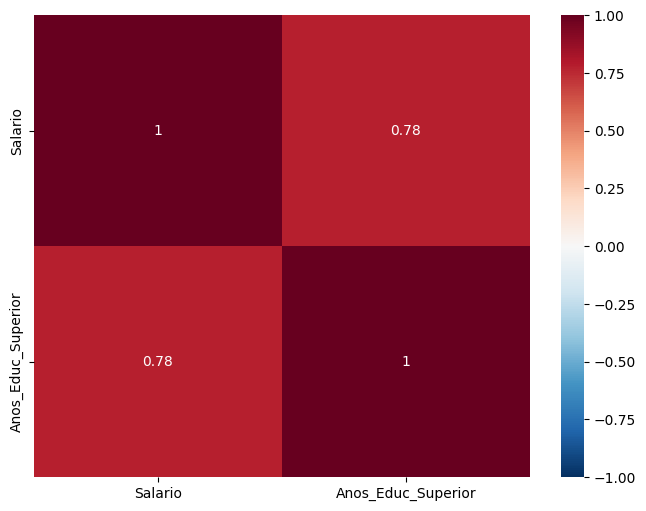

In [17]:
fig = plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), cmap='RdBu_r', vmin=-1, vmax=1, annot=True);

### Ajuste do Modelo de Regressão usando a biblioteca Statsmodels

In [19]:
# variável resposta
y = df.Salario

# variável explicativa
df['intercepto'] = 1 # no statsmodels precisamos definir o beta 0 explicitamente
x = df[['intercepto', 'Anos_Educ_Superior']]

In [21]:
# ajuste do Modelo
modelo = sm.OLS(y,x) # minimos quadrados ordinários
resultado = modelo.fit()

In [22]:
# resultado do ajuste
print(resultado.summary())

                            OLS Regression Results                            
Dep. Variable:                Salario   R-squared:                       0.604
Model:                            OLS   Adj. R-squared:                  0.595
Method:                 Least Squares   F-statistic:                     67.03
Date:                Mon, 27 May 2024   Prob (F-statistic):           2.18e-10
Time:                        08:40:52   Log-Likelihood:                -391.36
No. Observations:                  46   AIC:                             786.7
Df Residuals:                      44   BIC:                             790.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
intercepto          4301.7990    372

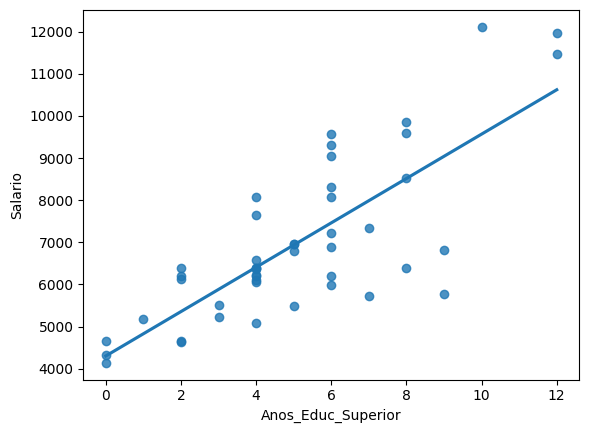

In [24]:
# gráfico de dispersão com a reta de regressão linear
sns.regplot(x=df.Anos_Educ_Superior, y=df.Salario, ci=None);

### Interpretação dos Coeficientes

**intercepto** ou $\beta_0$ : Salário médio de um colaborador sem educação superior é de *R$4.301,80*. \
$\beta_1$ x Anos de Educação Superior: Cada ano adicional de educação superior gera um aumento médio de *R$526,73*

Se os **Anos de Educação Superior** dos funcionários explicam aproximadamente 60% de seus **Salários**, quais são os outros
fatores (ou variáveis) que explicam os 40% restantes?

Com acesso a **mais variáveis**, podemos construir um **modelo** que **explique mais de 60%** da variabilidade da **variável Salário**

Sabemos que o salário muda de acordo com os Anos de Educação Superior, mas muda também conforme o Tempo de Empresa?